## 1. Introduction
Diabetes is a chronic condition that affects millions of people worldwide and, if not managed properly, can lead to serious health complications. Early detection is essential for preventing these complications and improving the quality of life for those at risk.

What if we could group or cluster individuals based on certain features to predict whether they are diabetic or not? In this project, I am working with patient data and using clustering techniques to categorize the data into two groups: predicted diabetic and predicted non-diabetic.

## 2.data selection
  Kaggle is an open-source community that hosts a comprehensive archive of diferrent categories of data. It provides valuable datasets for practitioners and researchers to explore, analyze, and develop predictive models in the field of real estate. I am sourcing my dataset from Kaggle location https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data

### *  Download data from Kaggle

In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)

Path to dataset files: /Users/tkma56b/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [2]:
import pandas as pd
diabetic_df = pd.read_csv(path +'/diabetes.csv')
diabetic_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### * Perform EDA on the data
* check for any nuls missing values
* Clean the data

In [3]:
# check the shape of the data and number of records
# Also check the datatypes
diabetic_df.shape
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#All are numeric data type , now it is time to check for missing data null values 
diabetic_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# no nulls but the head shows zeroes , now cout zeroes in each column if not valid will take action to cleanup
for column in diabetic_df.columns:
    print(f" count of zeros in {column}:{ (diabetic_df[column] == 0).sum()}")

 count of zeros in Pregnancies:111
 count of zeros in Glucose:5
 count of zeros in BloodPressure:35
 count of zeros in SkinThickness:227
 count of zeros in Insulin:374
 count of zeros in BMI:11
 count of zeros in DiabetesPedigreeFunction:0
 count of zeros in Age:0
 count of zeros in Outcome:500


In [6]:
# plan to handle this records with zero values
# 1) Pregnancies can be zero , out come is existing label so it can be zero or 1
# 2) Glucose , only 5 records so we can drop them
#3) BloodPressure,SkinThickness,Insulin,BMI will fill with mod and last one with mean
for column_name in ('BloodPressure','SkinThickness','Insulin'):
    # Calculate the mean of the column, ignoring zeroes
    mode_value = diabetic_df.loc[diabetic_df[column_name] != 0, column_name].mode()[0]
    diabetic_df[column_name] = diabetic_df[column_name].replace(0, mode_value)
column_name='BMI'
mean_value = diabetic_df.loc[diabetic_df[column_name] != 0, column_name].mean()
diabetic_df[column_name] = diabetic_df[column_name].replace(0, mean_value)

In [7]:
diabetic_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      105  33.6   
1            1       85             66             29      105  26.6   
2            8      183             64             32      105  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
diabetic_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      72.295573      29.994792  130.932292   
std       3.369578   31.972618      12.106756       8.886506   88.700443   
min       0.000000    0.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      25.000000  105.000000   
50%       3.000000  117.000000      72.000000      32.000000  105.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.400000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

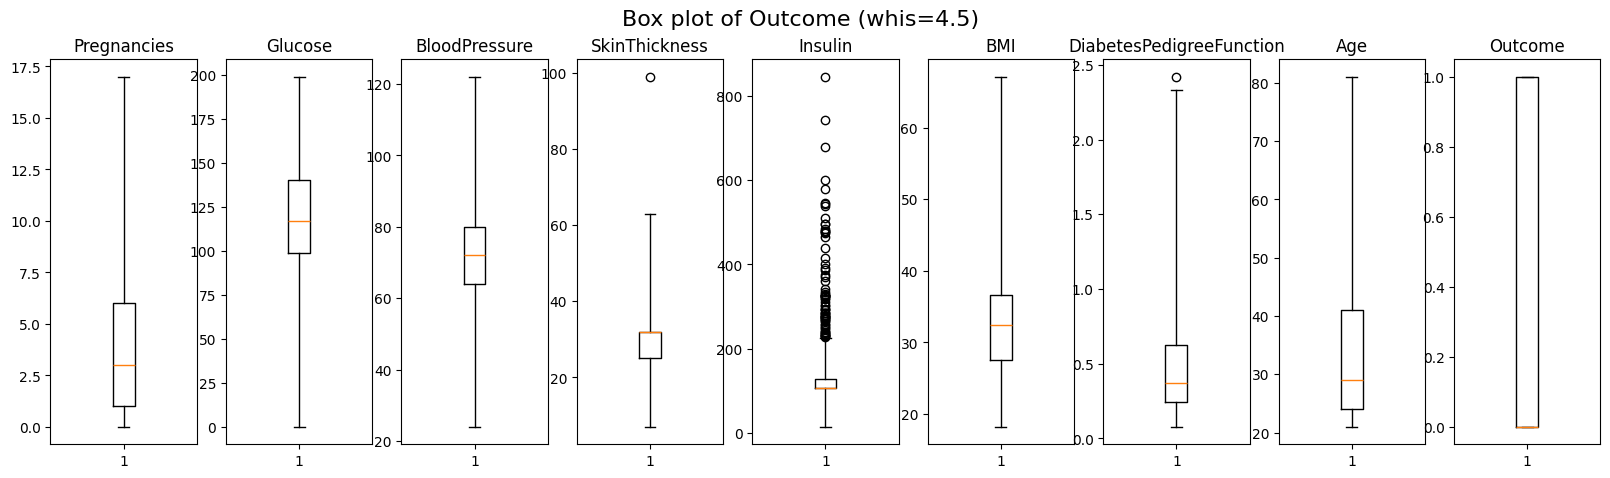

In [9]:
import matplotlib.pyplot as plt
# Create the figure and axes
fig, axs = plt.subplots(1, len(diabetic_df.columns), figsize=(20, 5))
for idx, cname in enumerate(diabetic_df.columns):
    # Create the first box plot
    axs[idx].boxplot(diabetic_df[cname],whis=4.5)
    axs[idx].set_title(cname)
fig.suptitle(f"Box plot of {cname} (whis=4.5)", fontsize=16)
plt.show()

#### From above skin thickness got 1 outlier , we will remove it from data. Also the insulin column need standardization. 

In [10]:
#lets drop the outlier fir skin thickness
diabetic_df[diabetic_df["SkinThickness"] >= 70].head() 
diabetic_df = diabetic_df.drop(diabetic_df[diabetic_df["SkinThickness"] >= 70].index)
diabetic_df.shape
# reset index 
diabetic_df = diabetic_df.reset_index(drop=True)

## 3 Dimensionality reduction
  The dataset features are small, but for clustering it is good idea to standardize the data and perform a dimensionality reduction. Here I will be ploting the components after reducting dimensions and validate the cluster.

In [11]:
from sklearn.preprocessing import StandardScaler
# Define the features and the outcome
X = diabetic_df.iloc[:, :8]
y = diabetic_df.iloc[:, 8]

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### * Below is the plan for it 
* Will try pca first and see how the clustering information is preserved 
* Next will move towards the more optimized UMAP technique

 PCA explained variance for components: [0.28353567 0.18611039 0.14660188 0.11360387 0.09601655 0.06825572
 0.05739865 0.04847726]


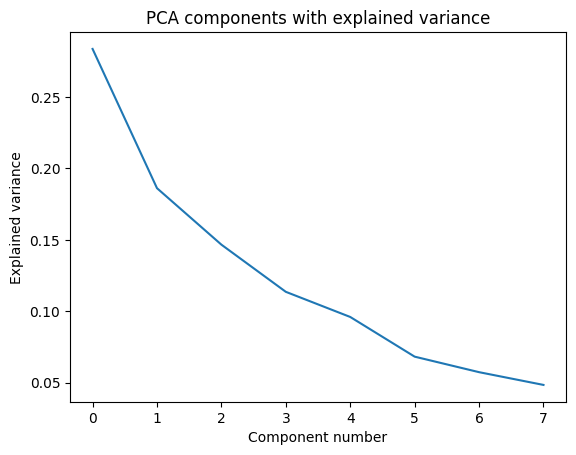

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# You just want the first two principal components
pca = PCA(n_components=8)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X_std)
print(f" PCA explained variance for components: {pca.explained_variance_ratio_}")
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Explained variance')
plt.title('PCA components with explained variance')
plt.show()

In [13]:
# You just want the first five principal components as it explain most of the variance
pca = PCA(n_components=5)

# Get the components by 
# calling `fit_transform()` method with the data
pca_components = pca.fit_transform(X_std)

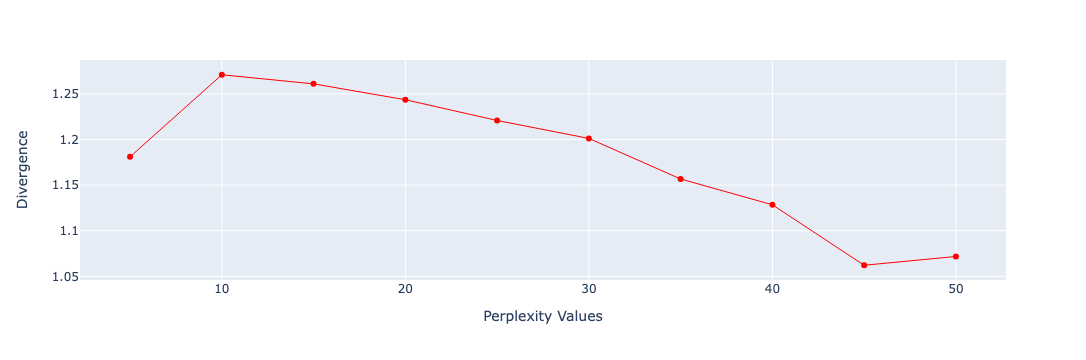

In [15]:
# plot and tune T-SNE with perplexity parameter
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, perplexity=i)
    reduced = model.fit_transform(X_std)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [17]:
# Minimum divergence is at 45 , So select perplexity as 45
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=350)
tsne_results = tsne.fit_transform(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 767 samples in 0.001s...
[t-SNE] Computed neighbors for 767 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 767 / 767
[t-SNE] Mean sigma: 12.982900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.215000
[t-SNE] KL divergence after 350 iterations: 0.611954


In [36]:
def plot_label(components,dtype):
    ''' plot components 
      plot components with color and target labels and colors '''
    plt.figure(figsize=(1, 1))
    plt.text(0.01, 0.01, f" Dimensionality reduction with {dtype}", fontsize=10)
    plt.axis('off')  # Hide the axes
    plt.show()
    plt.figure(figsize=(2, 1))
    colours = ["r", "b", "g"]
    for i in range(components.shape[0]):
        plt.text(components[i, 0], components[i, 1], str(y.iloc[i]),
                 color=colours[int(y.iloc[i])],
                 fontdict={'weight': 'bold', 'size': 30}
                 )
    plt.show()


def plot(components,dtype):
    ''' plot components 
      scatter plot components '''
    plt.figure(figsize=(10, 5))
    plt.scatter(components[:, 0], components[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(f" Dimensionality reduction with {dtype}",y=1.05)
    plt.show()

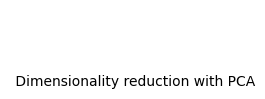

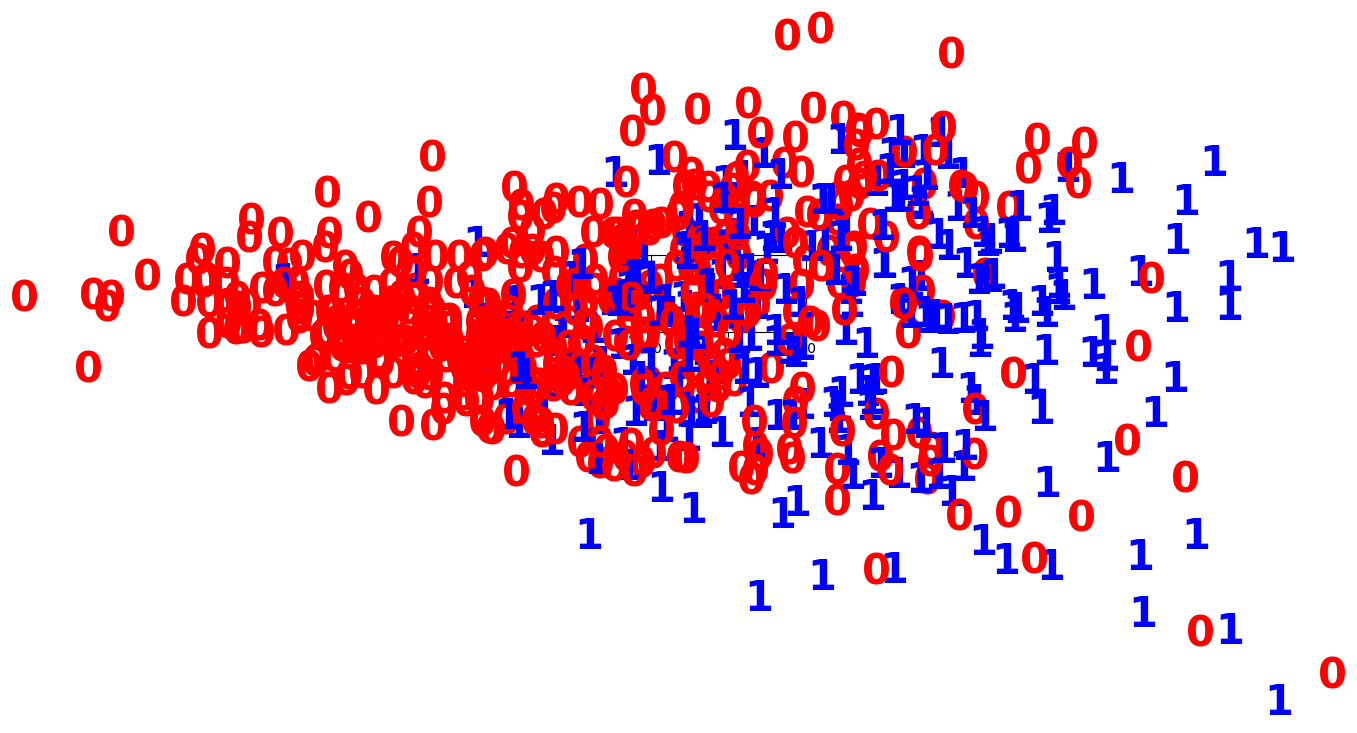

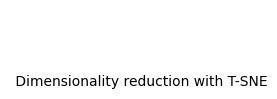

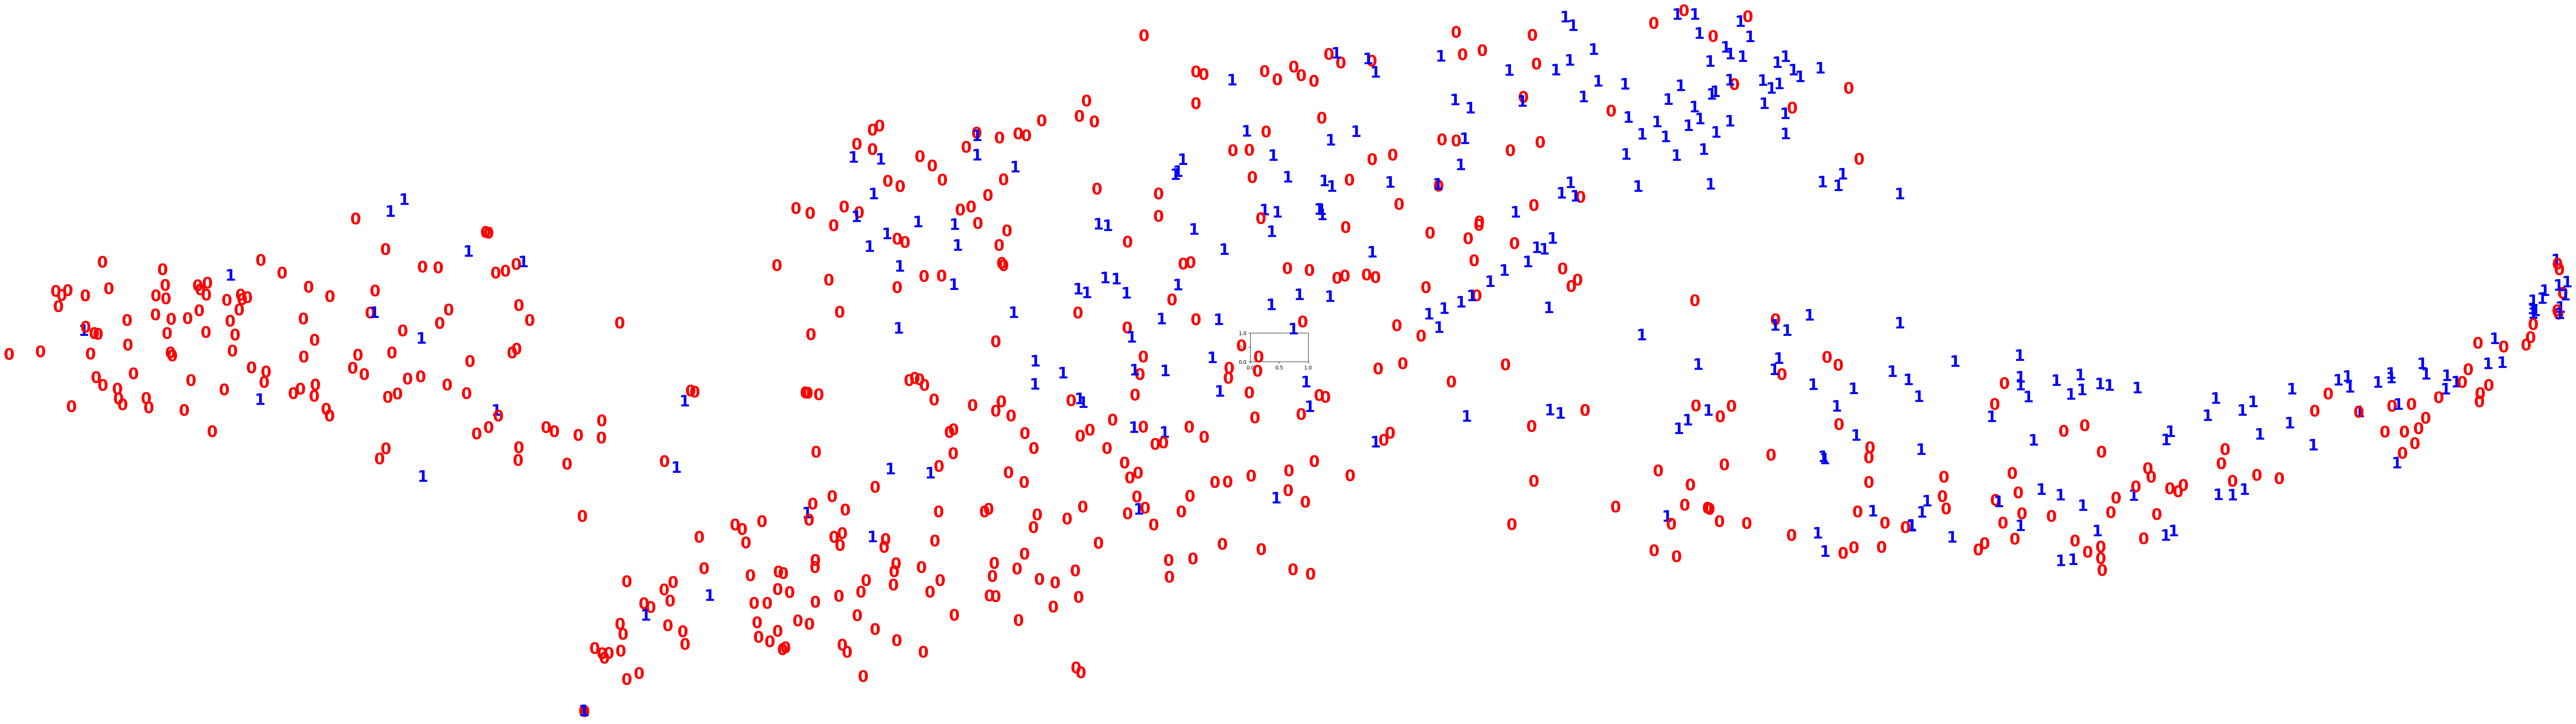

In [37]:
# time to compare PCA and T-SNE
plot_label(pca_components,"PCA")
plot_label(tsne_results,"T-SNE")


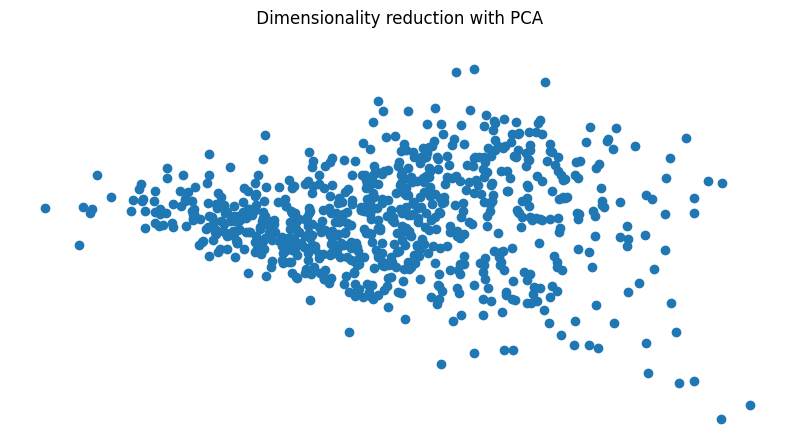

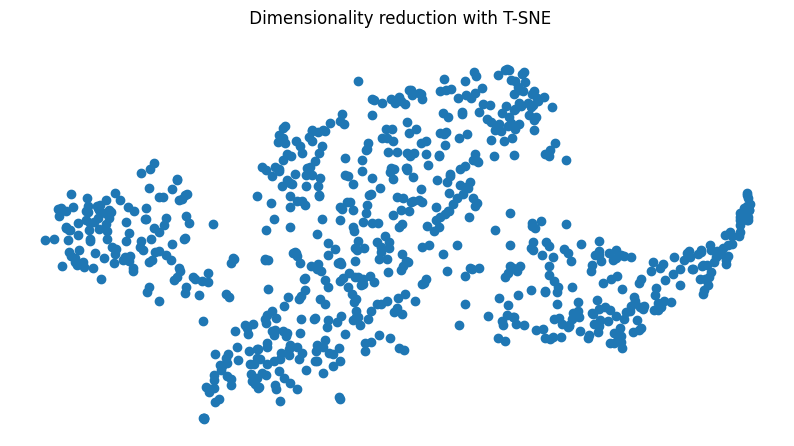

In [38]:
plot(pca_components,"PCA")
plot(tsne_results,"T-SNE")

##### 
* From above visual comparison , T-SNE map on the scatterplot with no color showing better cluster information. But when plotted with the known label in the above color diagram, which is not an accurate cluster. 
* In contrast, the PCA has all diabetic patients towards the right side of the diagram and on the left it shows non diabetic.
* So the PCA component represents a better cluster than T-SNE, hence selecting PCA for the clustering models.

In [59]:
components=pca_components

## 4 . Clustering the data
* I will apply simple k means to cluster the data and see performanace
* I will apply Gaussian mixture soft clustering algorithm and measure the performance 

In [60]:
from sklearn.cluster import KMeans
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(components)
y_pred = kmeans_cluster.predict(components)

1.36 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [61]:
def plot_pred(components,y_pred):
 plt.figure(figsize=(5,2))
 colours = ['r','b','g']
 for i in range(components.shape[0]):
    plt.text(components[i, 0], components[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()


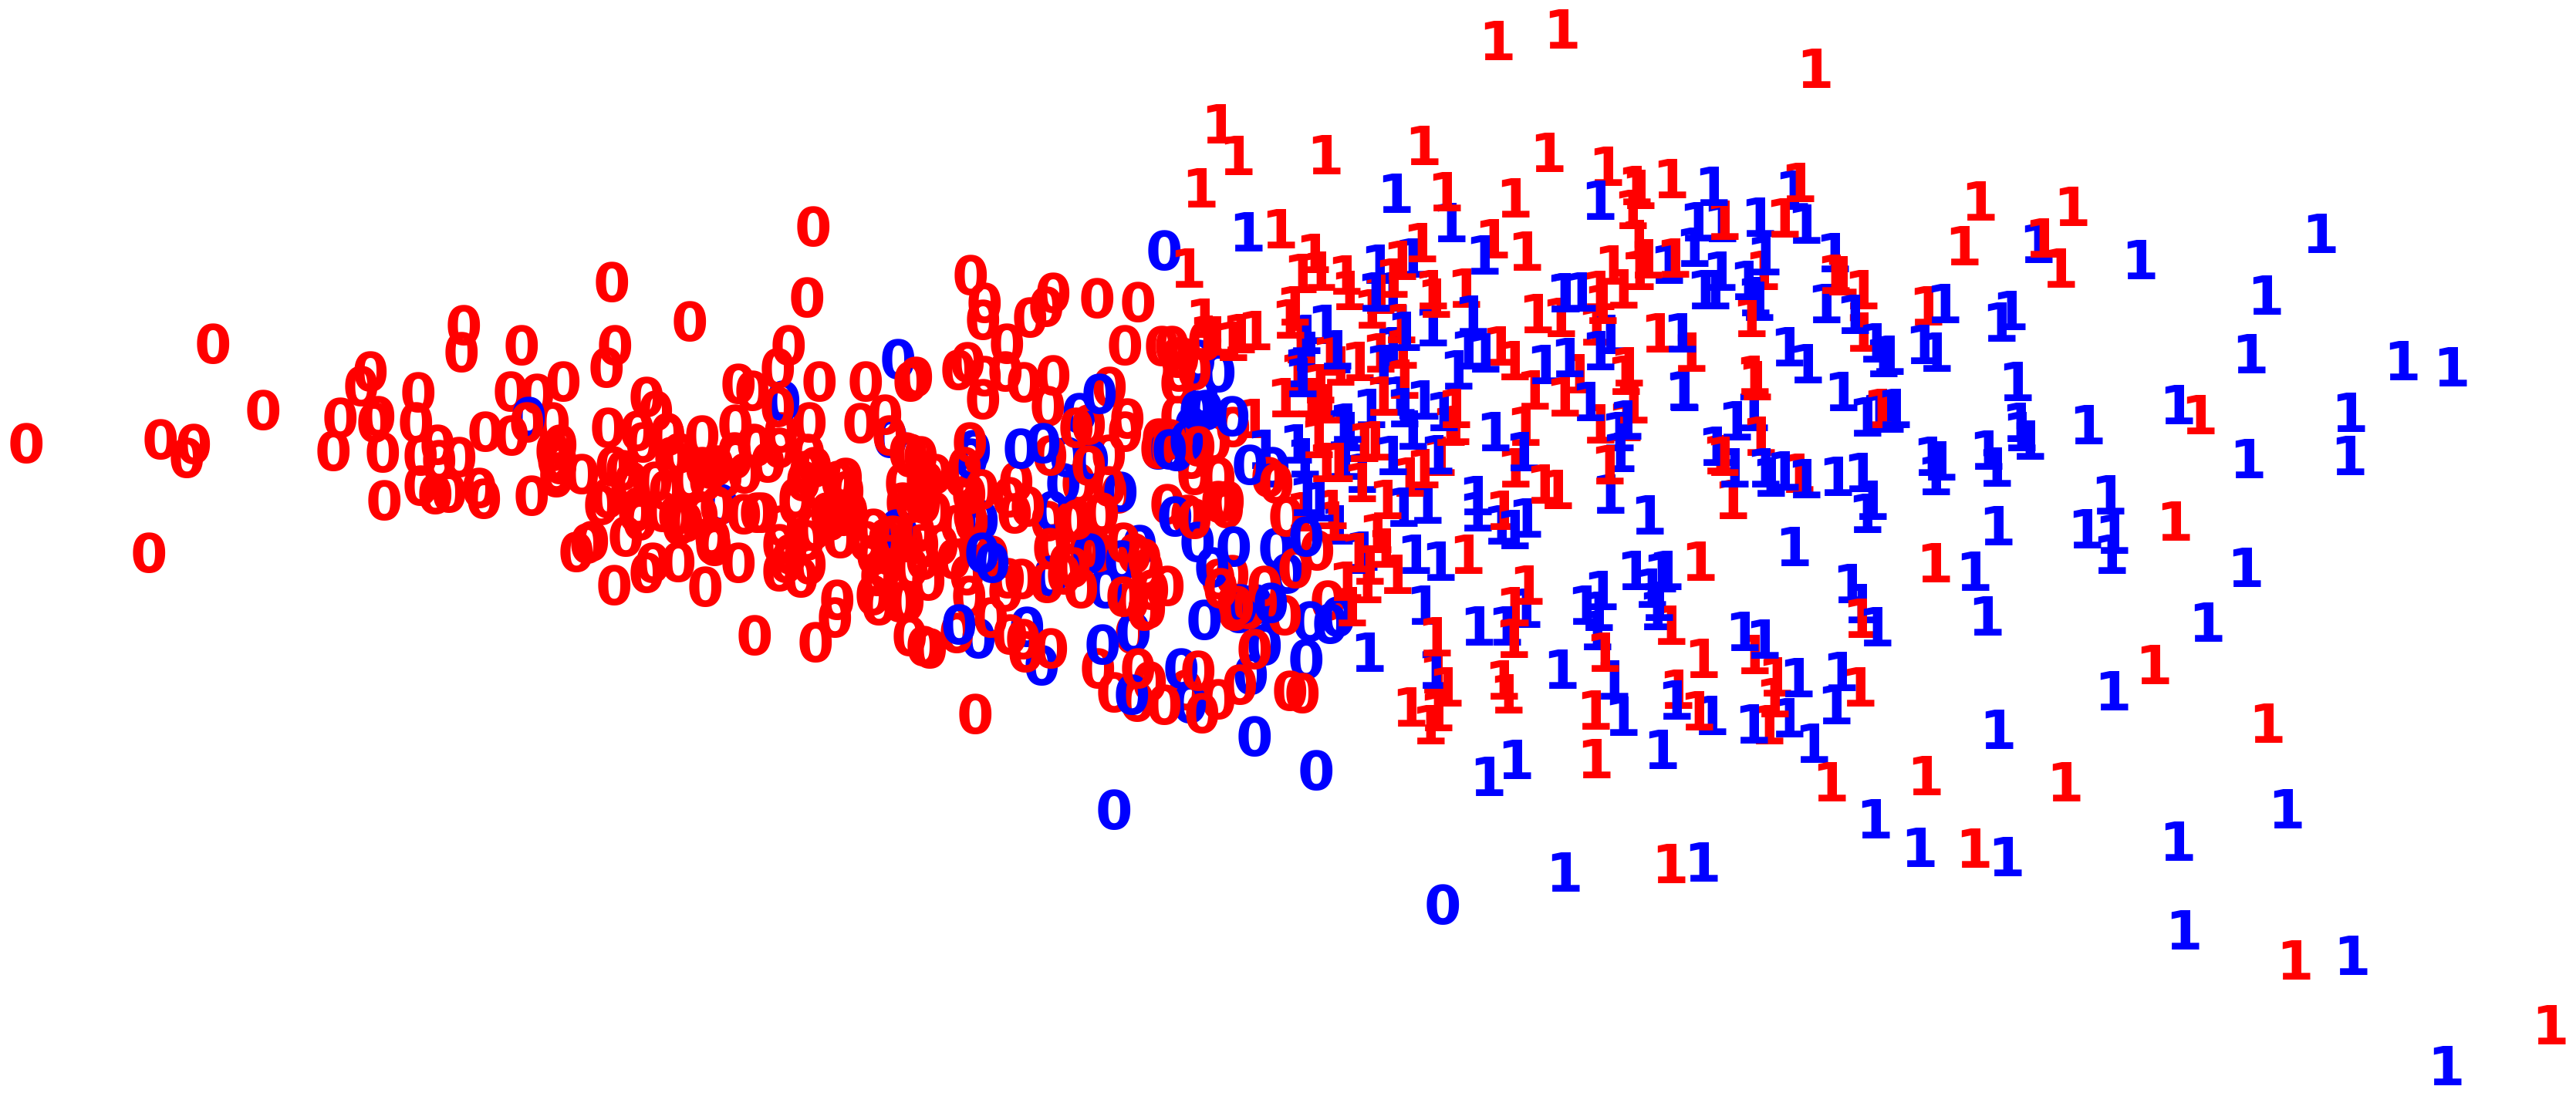

In [62]:
plot_pred(components,y_pred)

In [63]:
pd.crosstab(y,y_pred)

col_0      0    1
Outcome          
0        329  171
1         72  195

In [82]:
model_stats = []
from sklearn import  metrics
print('silhouette_score:',metrics.silhouette_score(X_std, y_pred, metric='euclidean'))
print('random index:' , metrics.rand_score(y,y_pred))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,y_pred))
model_stats.append([metrics.silhouette_score(X_std, y_pred, metric='euclidean'),
                metrics.rand_score(y,y_pred),
                metrics.adjusted_rand_score(y,y_pred)]
              )

silhouette_score: 0.19064706141485982
random index: 0.5665455931862977
adjusted random index: 0.13302961854848033


In [83]:
from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
# Fit model
clusters = gmm_cluster.fit_predict(components)

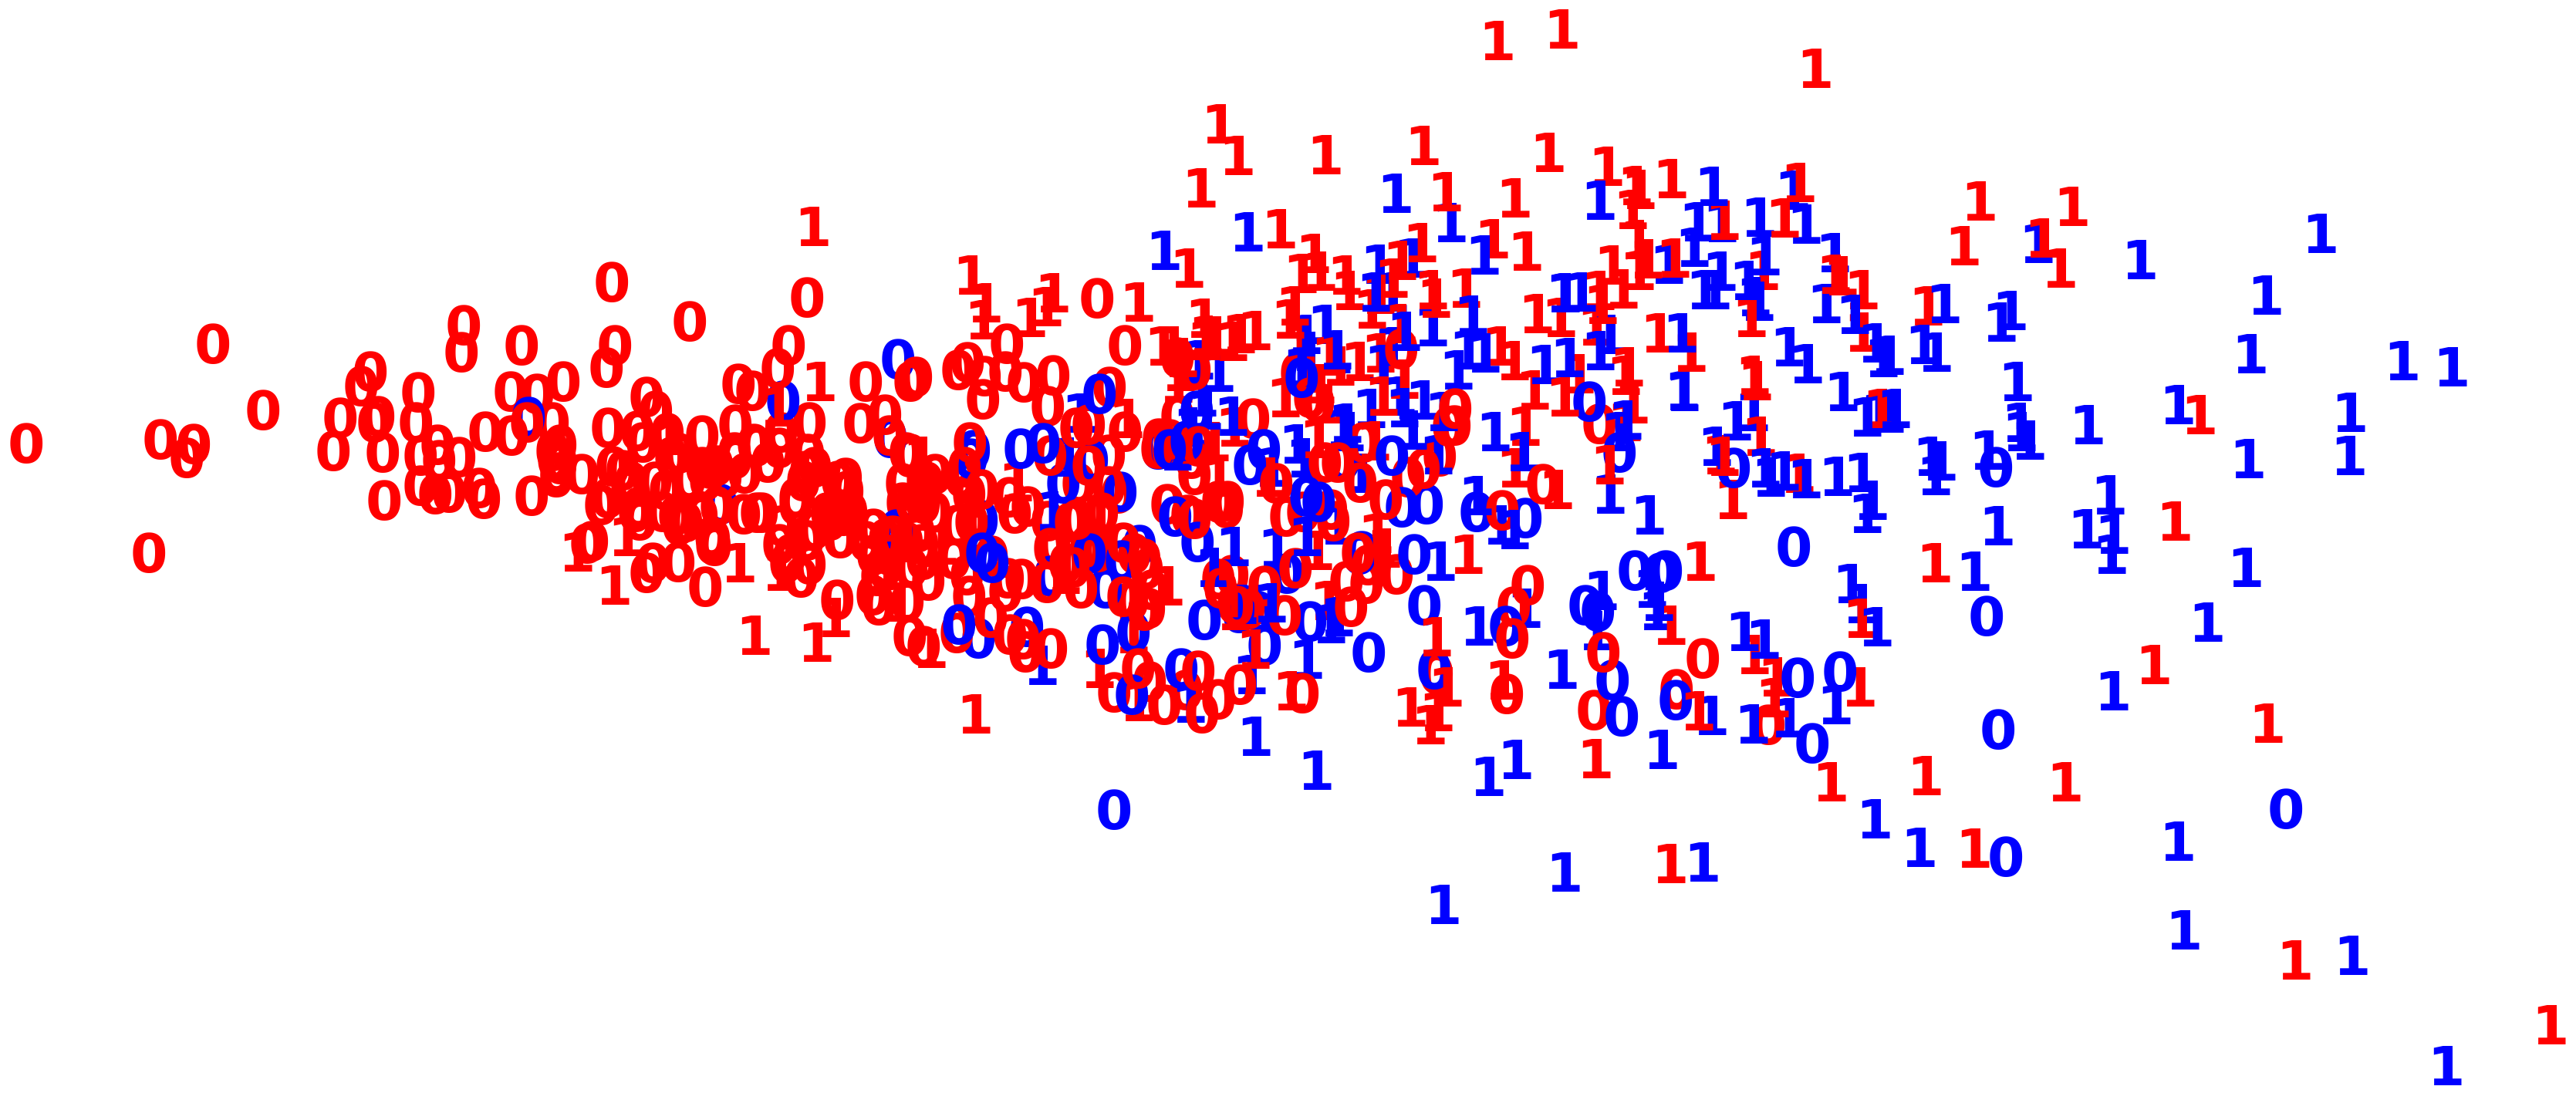

In [84]:
plot_pred(components,clusters)

In [85]:
print('silhouette_score:',metrics.silhouette_score(X_std, clusters, metric='euclidean'))
print('random index:' , metrics.rand_score(y,clusters))
print('adjusted random index:' ,metrics.adjusted_rand_score(y,clusters))
model_stats.append([metrics.silhouette_score(X_std, clusters, metric='euclidean'),
                metrics.rand_score(y,clusters),
                metrics.adjusted_rand_score(y,clusters)]
              )

silhouette_score: 0.15748423674012413
random index: 0.5495998447717703
adjusted random index: 0.09918935361979547


In [86]:
pd.crosstab(y,clusters)

col_0      0    1
Outcome          
0        318  182
1         80  187

### 5. Model performance

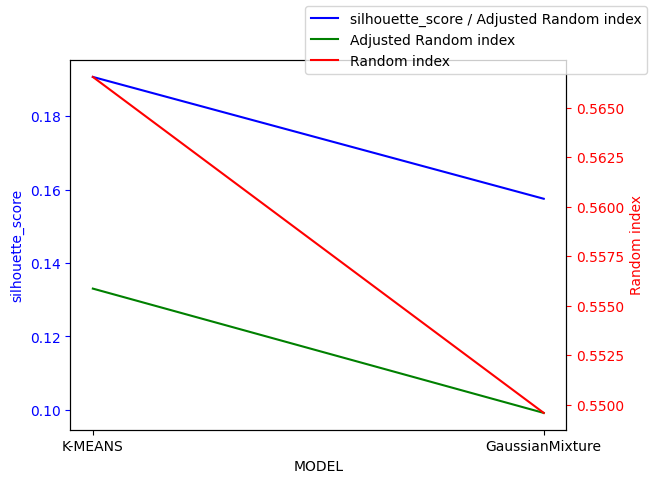

In [98]:
# Create the plot
fig, ax1 = plt.subplots()

# Plot the first y-axis
ax1.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][0],model_stats[1][0]], 'b-', label='silhouette_score / Adjusted Random index')
ax1.set_xlabel('MODEL')
ax1.set_ylabel('silhouette_score', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][1],model_stats[1][1]], 'r-', label='Random index')
ax2.set_ylabel('Random index', color='r')
ax2.tick_params('y', colors='r')
ax1.plot( ['K-MEANS','GaussianMixture'],[model_stats[0][2],model_stats[1][2]], 'g-', label='Adjusted Random index')

fig.legend()
plt.show()


#### comparison summary
  Clustering techniques, specifically K-Means and Gaussian Mixture, were applied to cluster the diabetes data. Both models showed positive results across metrics such as the silhouette score and random index.

The comparison diagram above illustrates that K-Means outperforms Gaussian Mixture, achieving higher values for the silhouette score, random index, and adjusted Rand index (ARI).
Conclusion: Based on these metrics, the K-Means model is the preferred choice for clustering the diabetes data.

## 6. Final thoughts
* Dimensionality reduction techniques and visualization help approximate the clusters within the data, revealing patterns and categorizations in a two-dimensional space.

* Clustering techniques such as K-Means and Gaussian Mixture provide deeper insights into the structure of the data. The plot above visualizes the data in a two-dimensional space, highlighting the clusters identified by these unsupervised learning methods.

*  I have selected a dataset with available labels, which makes it particularly interesting to evaluate the performance of supervised learning techniques. Given the results, further exploration using supervised learning approaches is recommended to fully assess the predictive capabilities of the model on this data.